<a href="https://colab.research.google.com/github/dikshasen24/Heart-Disease-Prediction/blob/master/5_feature_LogReg_for_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5-FEATURE LOGISTIC MODEL** 

age, sex, cp, chol, trestbps

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# We are reading our data
heart = pd.read_csv("heart_uci.csv")

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [ ]:
heart.drop(['fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], axis = 1, inplace = True)

In [ ]:
heart

,age,sex,cp,trestbps,chol,condition
0,69,1,0,160,234,0
1,69,0,0,140,239,0
2,66,0,0,150,226,0
3,65,1,0,138,282,1
4,64,1,0,110,211,0
...,...,...,...,...,...,...
292,40,1,3,152,223,1
293,39,1,3,118,219,1
294,35,1,3,120,198,1
295,35,0,3,138,183,0


In [ ]:
X= heart.drop(['condition'], axis= 1)

In [ ]:
X

,age,sex,cp,trestbps,chol
0,69,1,0,160,234
1,69,0,0,140,239
2,66,0,0,150,226
3,65,1,0,138,282
4,64,1,0,110,211
...,...,...,...,...,...
292,40,1,3,152,223
293,39,1,3,118,219
294,35,1,3,120,198
295,35,0,3,138,183


In [ ]:
y = heart['condition']

In [ ]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=10)

In [ ]:
X_train.shape

(207, 5)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# fit train data to log reg model

smallmodel = LogisticRegression()
smallmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# now apply predict function to predict for X_test

predictions = smallmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(y_test, predictions)

In [ ]:
accuracy

array([[36, 13],
       [10, 31]])

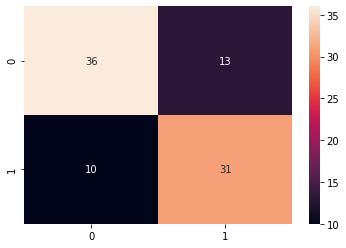

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(accuracy, annot= True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)

In [ ]:
accuracy

# model accuracy is 74.44% 

0.7444444444444445

In [ ]:
trainpred = smallmodel.predict(X_train)
acc = accuracy_score(y_train, trainpred)
acc

0.7922705314009661

In [ ]:
print(smallmodel.coef_, smallmodel.intercept_)

[[5.59534083e-02 1.78625094e+00 1.07569593e+00 2.19839835e-02
  1.51766536e-03]] [-10.09614008]


Feature: 0, Score: 0.05595
Feature: 1, Score: 1.78625
Feature: 2, Score: 1.07570
Feature: 3, Score: 0.02198
Feature: 4, Score: 0.00152


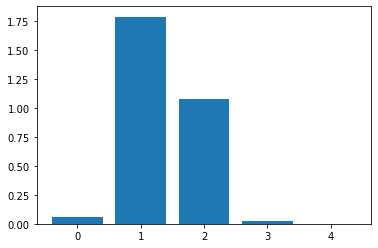

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get importance
importance = smallmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# saving results to csv

res = pd.DataFrame(predictions)
res.index = X_test.index
res.columns = ["prediction"]
res.to_csv("log5prediction_results.csv")

In [ ]:
# saving actual values for reference 

act = pd.DataFrame(y_test)
act.to_csv("actual.csv")